<a href="https://colab.research.google.com/github/deboradcm/IARTES/blob/master/Atividade_1_Modelos_introdut%C3%B3rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1

## Modelos Introdutórios

Neste *notebook* você deverá trabalhar com os modelos estudados até aqui:

- Árvore de decisão
- Naive Bayes
- k-NN

Para cada modelo você deverá:

- Fazer ajuste de hiperparâmetros usando um conjunto de treinamento e um conjunto de validação
- Testar o modelo usando um conjunto de treinamento e um conjunto de testes

### Passo 1: Importe as bibliotecas e carregue os dados

Vamos importar todas as bibliotecas e funções de uma vez:

In [ ]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

Vamos trabalhar com os arquivos disponibilizados no ColabWeb.

Use a função `pd.read_csv()` para carregar o arquivo de treinamento (`iris-treino.csv`).

In [ ]:
treino = pd.read_csv("/content/iris-treino.csv")   # <-- complete o código

In [ ]:
treino.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.2,3.4,5.4,2.3,virginica
1,5.1,3.3,1.7,0.5,setosa
2,6.7,2.5,5.8,1.8,virginica
3,5.6,2.5,3.9,1.1,versicolor
4,4.4,3.2,1.3,0.2,setosa


Use a função `pd.read_csv()` para carregar o arquivo de teste (`iris-teste.csv`).

In [ ]:
teste = pd.read_csv("/content/iris-teste.csv") # <-- complete o código

In [ ]:
teste.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,3.8,6.7,2.2,virginica
1,6.3,3.3,6.0,2.5,virginica
2,7.2,3.2,6.0,1.8,virginica
3,7.0,3.2,4.7,1.4,versicolor
4,6.8,2.8,4.8,1.4,versicolor


### Passo 2: processamento da classe

A última coluna contém o conceito (o resultado correto do mapeamento).

O DataFrame contém strings para o conceito (nome da espécie). O scikit-learn requer que esse conceito seja composto por valores numéricos.

Use a classe `LabelEncoder` para transformar esses valores em numéricos.

In [ ]:
le = LabelEncoder()

Primeiro, use `fit` sobre o conjunto de treinamento para "aprender" o mapeamento de string para inteiro

In [ ]:
le.fit(treino.iloc[:, -1]);  #o codificador de rótulos está aprendendo os rótulos presentes na última coluna do DataFrame

Agora, use `transform` para substituir as strings pelos valores numéricos. (**Observação**: dependendo da sua versão do Pandas, pode aparecer uma mensagem advertência na linha abaixo; ela pode ser ignorada)

In [ ]:
treino.iloc[:, -1] = le.transform(treino.iloc[:, -1])

<ipython-input-9-c1471b2040de>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  treino.iloc[:, -1] = le.transform(treino.iloc[:, -1])


In [ ]:
treino.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.2,3.4,5.4,2.3,2
1,5.1,3.3,1.7,0.5,0
2,6.7,2.5,5.8,1.8,2
3,5.6,2.5,3.9,1.1,1
4,4.4,3.2,1.3,0.2,0


Agora faça o mesmo com o teste.

In [ ]:
le.fit(teste.iloc[:, -1]) #complete o código

LabelEncoder()

In [ ]:
teste.iloc[:, -1] = le.transform(teste.iloc[:, -1])

<ipython-input-12-ee3208512886>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  teste.iloc[:, -1] = le.transform(teste.iloc[:, -1])


In [ ]:
teste.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,3.8,6.7,2.2,2
1,6.3,3.3,6.0,2.5,2
2,7.2,3.2,6.0,1.8,2
3,7.0,3.2,4.7,1.4,1
4,6.8,2.8,4.8,1.4,1


### Passo 3: Treino e teste dos modelos

Usando os conhecimentos que você aprendeu nas aulas anteriores, treine e teste os modelos de árvore de decisão, Naive Bayes e k-NN.

Não faça nenhum ajuste de hiperparâmetros. Use as configurações *default* de cada uma das classes.

In [ ]:
X_treino = treino.iloc[:,:-1]  # features
y_treino = treino.iloc[:,-1]   # rótulos

In [ ]:
X_teste = teste.iloc[:,:-1]
y_teste = teste.iloc[:,-1]

Treino e teste para o modelo de árvore de decisão:

In [ ]:
arvore = DecisionTreeClassifier() #inicialização
arvore.fit(X_treino,y_treino) #treinamento
ypred_arvore = arvore.predict(X_teste) #teste
acuracia_arvore = accuracy_score(y_teste,ypred_arvore)
acuracia_arvore

0.9534883720930233

In [ ]:
#Diagrama da árvore de decisão
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

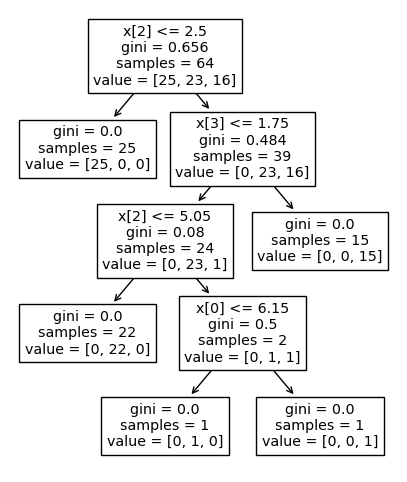

In [ ]:
plt.figure(figsize=(5, 6));
sklearn.tree.plot_tree(arvore);


Treino e teste para o modelo de Naive Bayes:




In [ ]:
naive_bayes = GaussianNB() #Inicialização
naive_bayes.fit(X_treino,y_treino) #treino
ypred_naive = naive_bayes.predict(X_teste) #teste
acuracia_naive = accuracy_score(y_teste,ypred_naive)
acuracia_naive

0.9534883720930233

In [ ]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

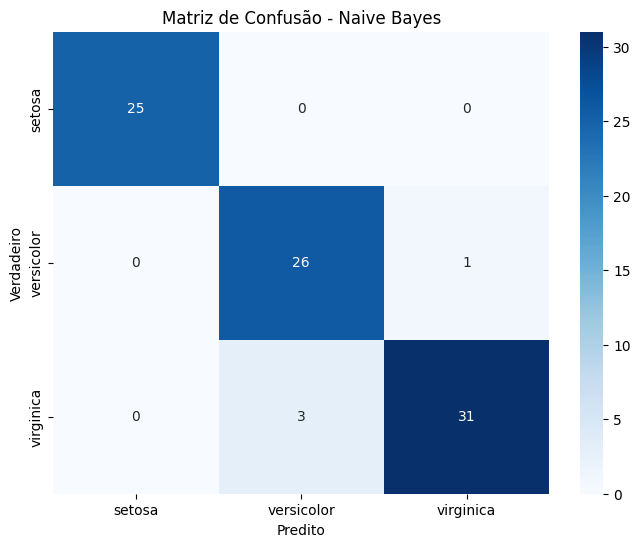

In [ ]:
matriz_confusao = confusion_matrix(y_teste,ypred_naive)  #gera matriz
plt.figure(figsize=(8,6))
sns.heatmap(matriz_confusao, annot=True, cmap="Blues",fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Naive Bayes")
plt.show


Treino e teste para o modelo de k-NN:



In [ ]:
knn = KNeighborsClassifier() #Inicialização
knn.fit(X_treino, y_treino) #Treino
ypred_knn = knn.predict(X_teste)
acuracia_knn = accuracy_score(y_teste, ypred_knn)
acuracia_knn

0.9651162790697675

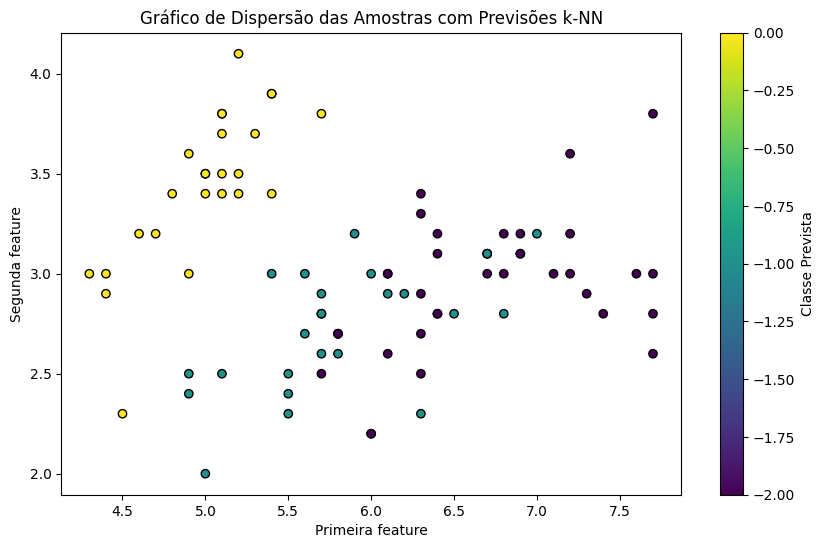

In [ ]:
#Gráfico de dispersão das duas primeiras features
plt.figure(figsize=(10,6))
plt.scatter(X_teste.iloc[:,0], X_teste.iloc[:,1], c=-ypred_knn, cmap="viridis", edgecolors="k")
plt.xlabel("Primeira feature")
plt.ylabel("Segunda feature")
plt.title("Gráfico de Dispersão das Amostras com Previsões k-NN")
plt.colorbar(label='Classe Prevista')
plt.show()

### Passo 3,5: Verificação do *notebook*

Para a próxima atividade você precisará que as variáveis `treino` e `teste` estejam da forma como ela foi carregada. Execute a célula abaixo e, se qualquer um dos testes falhar, faça novamente os passos 1 e 2.

In [ ]:
if treino.shape != (64, 5):print("O número de linhas ou colunas do treino está errado.")
if teste.shape != (86, 5): print("O número de linhas ou colunas do teste está errado.")

if treino.iloc[:,-1].dtype != int: print('A última coluna do treino não é numérica.')
if teste.iloc[:,-1].dtype != int: print('A última coluna do teste não é numérica.')

soma_treino = np.array([365.9, 198.7, 221.4,  69.2,  55. ])
soma_teste = np.array([510.6, 259.9, 342.3, 110.7,  95. ])

if (np.abs(treino.sum() - soma_treino) > 0.1).any(): print('Existem valores incorretos na tabela de treino.')
if (np.abs(teste.sum() - soma_teste) > 0.1).any(): print('Existem valores incorretos na tabela de teste.')

### Passo 4: Ajuste de hiperparâmetros

Agora vamos verificar se é possível ajustar os hiperparâmetros de acordo com um conjunto de validação.

A ideia é simples, vamos dividir o conjunto de treino em um **novo conjunto de treino** e um conjunto de validação. Podemos fazer isso utilizando a função `train_test_split`.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(treino.iloc[:, :-1], treino.iloc[:, -1],
                                                    random_state=42, test_size=0.3, stratify=treino.iloc[:, -1])

#### Árvore de Decisão

Teste diferentes configurações da árvore de decisão com o conjunto de validação.

1) Verifique se o desempenho do modelo usa quando o critério é alterado para `criterion='entropy'`.

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')

# Continue o código para treinar a árvore com (X_train, y_train) e testar a árvore com (X_val, y_val)

In [ ]:
clf.fit(X_train,y_train) #treinamento
ypred_clf = clf.predict(X_val) #teste

In [ ]:
acuracia_clf = accuracy_score(y_val,ypred_clf)
acuracia_clf

0.95

2) Verifique se o desempenho do modelo usa quando especificamos uma altura máxima para a árvore. Para especificar a altura máxima da árvore, use o argumento `max_depth=ALTURA` quando for instanciar o objeto da classe `DecisionTreeClassifier`.

In [ ]:
ALTURA = 3
clf = DecisionTreeClassifier(max_depth=ALTURA)

clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)

acuracia_val = accuracy_score(y_val, y_pred_val)
acuracia_val

0.95

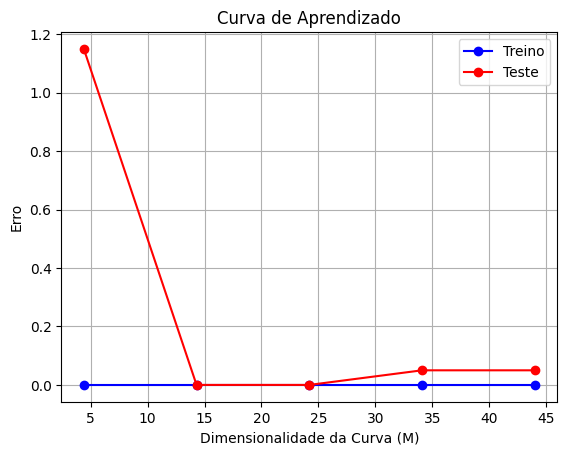

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Função da curva de aprendizado
def plot_learning_curve(estimador, titulo, X_train, y_train, X_val, y_val, cv=None, tamanhos_treino=np.linspace(.1, 1.0, 5)):
    erros_empiricos_treino = []
    erros_empiricos_teste = []

    for tamanho in tamanhos_treino:
        estimador.fit(X_train[:int(tamanho * len(X_train))], y_train[:int(tamanho * len(X_train))])  # Ajuste o modelo com um subconjunto dos dados de treinamento
        predicoes_treino = estimador.predict(X_train[:int(tamanho * len(X_train))])  # Faça previsões no mesmo subconjunto de treinamento
        erro_empirico_treino = mean_squared_error(y_train[:int(tamanho * len(X_train))], predicoes_treino)  # Calcule o erro empírico no conjunto de treinamento
        erros_empiricos_treino.append(erro_empirico_treino)

        predicoes_teste = estimador.predict(X_val)  # Faça previsões no conjunto de validação
        erro_empirico_teste = mean_squared_error(y_val, predicoes_teste)  # Calcule o erro empírico no conjunto de validação
        erros_empiricos_teste.append(erro_empirico_teste)

    plt.figure()
    plt.title(titulo)
    plt.xlabel("Dimensionalidade da Curva (M)")
    plt.ylabel("Erro")
    plt.grid()

    plt.plot(tamanhos_treino * len(X_train), erros_empiricos_treino, 'o-', color="b", label="Treino")
    plt.plot(tamanhos_treino * len(X_train), erros_empiricos_teste, 'o-', color="r", label="Teste")
    plt.legend(loc="best")
    return plt


plot_learning_curve(clf, "Curva de Aprendizado", X_train, y_train, X_val, y_val, cv=5)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)             ##################################################################

# Realizando a validação cruzada com 5 folds                               ##################################################################
scores = cross_val_score(clf, X_train, y_train, cv=5)

#Pontuações de validação cruzada
print("Acurácia média: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Acurácia média: 0.93 (+/- 0.11)


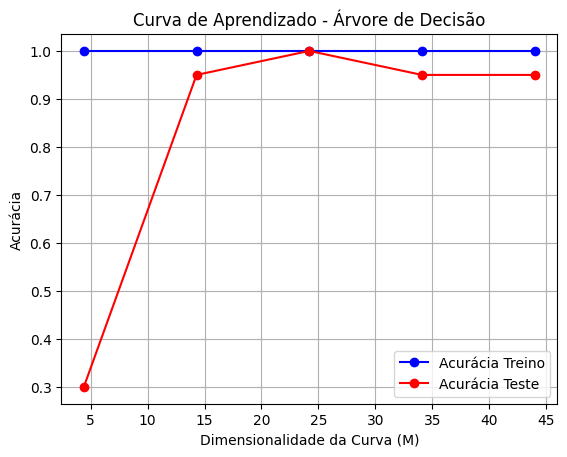

In [ ]:
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimador, titulo, X_train, y_train, X_val, y_val, cv=None, tamanhos_treino=np.linspace(.1, 1.0, 5)):
    acuracias_treino = []
    acuracias_teste = []

    for tamanho in tamanhos_treino:
        tamanho_absoluto = int(tamanho * len(X_train))
        estimador.fit(X_train[:tamanho_absoluto], y_train[:tamanho_absoluto])
        predicoes_treino = estimador.predict(X_train[:tamanho_absoluto])
        acuracia_treino = accuracy_score(y_train[:tamanho_absoluto], predicoes_treino)
        acuracias_treino.append(acuracia_treino)

        predicoes_teste = estimador.predict(X_val)
        acuracia_teste = accuracy_score(y_val, predicoes_teste)
        acuracias_teste.append(acuracia_teste)

    plt.figure()
    plt.title(titulo)
    plt.xlabel("Dimensionalidade da Curva (M)")
    plt.ylabel("Acurácia")
    plt.grid()

    plt.plot(tamanhos_treino * len(X_train), acuracias_treino, 'o-', color="b", label="Acurácia Treino")
    plt.plot(tamanhos_treino * len(X_train), acuracias_teste, 'o-', color="r", label="Acurácia Teste")
    plt.legend(loc="best")
    return plt

plot_learning_curve(clf, "Curva de Aprendizado - Árvore de Decisão", X_train, y_train, X_val, y_val, cv=5)
plt.show()


#### Naive Bayes

O Naive Bayes gaussiano não tem nenhum hiperparâmetro para ajustarmos neste momento.

Apenas verifique o desempenho do modelo no conjunto de validação.

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train) # Treine o modelo com o conjunto de treinamento
y_pred_val = nb.predict(X_val) # Faça previsões no conjunto de validação

acuracia_nb = accuracy_score(y_val, y_pred_val)
acuracia_nb

1.0

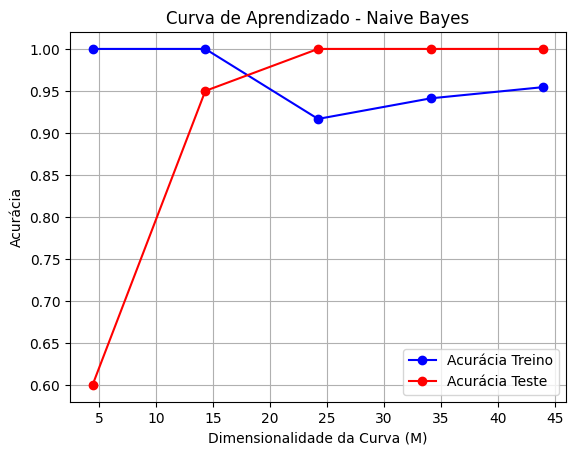

In [ ]:
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimador, titulo, X_train, y_train, X_val, y_val, cv=None, tamanhos_treino=np.linspace(.1, 1.0, 5)):
    acuracias_treino = []
    acuracias_teste = []

    for tamanho in tamanhos_treino:
        tamanho_absoluto = int(tamanho * len(X_train))
        estimador.fit(X_train[:tamanho_absoluto], y_train[:tamanho_absoluto])
        predicoes_treino = estimador.predict(X_train[:tamanho_absoluto])
        acuracia_treino = accuracy_score(y_train[:tamanho_absoluto], predicoes_treino)
        acuracias_treino.append(acuracia_treino)

        predicoes_teste = estimador.predict(X_val)
        acuracia_teste = accuracy_score(y_val, predicoes_teste)
        acuracias_teste.append(acuracia_teste)

    plt.figure()
    plt.title(titulo)
    plt.xlabel("Dimensionalidade da Curva (M)")
    plt.ylabel("Acurácia")
    plt.grid()

    plt.plot(tamanhos_treino * len(X_train), acuracias_treino, 'o-', color="b", label="Acurácia Treino")
    plt.plot(tamanhos_treino * len(X_train), acuracias_teste, 'o-', color="r", label="Acurácia Teste")
    plt.legend(loc="best")
    return plt

plot_learning_curve(nb, "Curva de Aprendizado - Naive Bayes", X_train, y_train, X_val, y_val, cv=5)
plt.show()


In [ ]:
nb_validacao_cruzada = GaussianNB()

scores = cross_val_score(nb_validacao_cruzada, X_train, y_train, cv=5)

print("Acurácia média: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Acurácia média: 0.96 (+/- 0.11)


#### k-NN

Teste diferentes configurações do modelo de vizinhança com o conjunto de validação.


1) Experimente trocar a função de distância. Para isso, especifique um valor para o parâmetro `metric`. Por exemplo, `metric='euclidean'` utiliza a distância euclidiana, enquanto `metric='manhattan'` utiliza a distância Manhattan. Veja a documentação para uma lista de nomes de métricas: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

In [ ]:
# Métrica de distância: Euclidean
knn_euclidiana = KNeighborsClassifier(metric='euclidean')
knn_euclidiana.fit(X_train, y_train)
acuracia_euclidiana = knn_euclidiana.score(X_val, y_val)
acuracia_euclidiana

0.95

In [ ]:
# Métrica de distância: Manhattan
knn_manhattan = KNeighborsClassifier(metric='manhattan')
knn_manhattan.fit(X_train, y_train)
acuracia_manhattan = knn_manhattan.score(X_val, y_val)
acuracia_manhattan

0.95

In [ ]:
# Métrica de distância: cosine
knn_cosine = KNeighborsClassifier(metric='cosine')
knn_cosine.fit(X_train, y_train)
acuracia_cosine = knn_cosine.score(X_val, y_val)
acuracia_cosine

0.9

In [ ]:
# Métrica de distância: cityblock
knn_cityblock = KNeighborsClassifier(metric='cityblock')
knn_cityblock.fit(X_train, y_train)
acuracia_cityblock = knn_cityblock.score(X_val, y_val)
acuracia_cityblock

0.95

In [ ]:
# Métrica de distância: l1
knn_l1 = KNeighborsClassifier(metric='l1')
knn_l1.fit(X_train, y_train)
acuracia_l1 = knn_l1.score(X_val, y_val)
acuracia_l1

0.95

In [ ]:
# Métrica de distância: l2
knn_l2 = KNeighborsClassifier(metric='l2')
knn_l2.fit(X_train, y_train)
acuracia_l2 = knn_l2.score(X_val, y_val)
acuracia_l2

0.95

In [ ]:
# Métrica de distância: nan_euclidean
knn_nan_euclidean = KNeighborsClassifier(metric='nan_euclidean')
knn_nan_euclidean.fit(X_train, y_train)
acuracia_nan_euclidean = knn_nan_euclidean.score(X_val, y_val)
acuracia_nan_euclidean

0.95

2. Verifique o desempenho do modelo com diferentes números de vizinhos. Utilize o parâmetro `n_neighbors=NUMERO`. Você pode fazer um laço de repetição de 1 até 10, por exemplo, para facilmente verificar a quantidade de vizinhos.

Número de vizinhos: 1, Acurácia: 0.95
Número de vizinhos: 2, Acurácia: 0.9
Número de vizinhos: 3, Acurácia: 0.95
Número de vizinhos: 4, Acurácia: 0.95
Número de vizinhos: 5, Acurácia: 0.95
Número de vizinhos: 6, Acurácia: 0.95
Número de vizinhos: 7, Acurácia: 0.95
Número de vizinhos: 8, Acurácia: 0.95
Número de vizinhos: 9, Acurácia: 0.95
Número de vizinhos: 10, Acurácia: 0.95


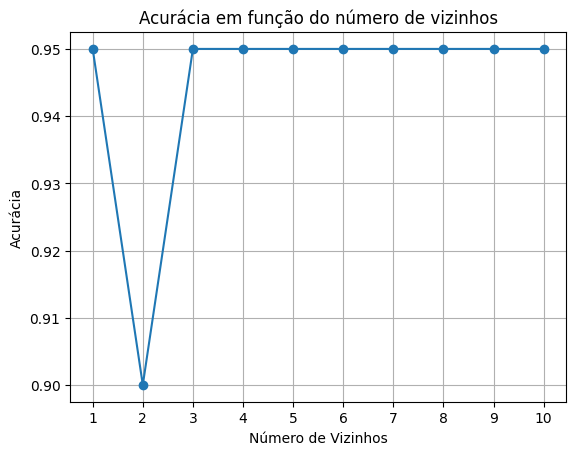

In [ ]:
acuracias = [] #armazenar as acurácias

for num_vizinhos in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=num_vizinhos)

    knn.fit(X_train, y_train)

    y_pred_val = knn.predict(X_val)

    acuracia = accuracy_score(y_val, y_pred_val)
    acuracias.append(acuracia)

    print(f"Número de vizinhos: {num_vizinhos}, Acurácia: {acuracia}")

plt.plot(range(1, 11), acuracias, marker='o')
plt.title('Acurácia em função do número de vizinhos')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Passo 5: Considerações

1) Qual foi a melhor configuração para a árvore de decisão que você entrou no passo 4? Isto é, quais foram os valores de `criterion` e `max_depth` que produziram o melhor resultado no conjunto de validação?

Testei o criterion com entropy e gini, mas ambos deram o mesmo resultado de acurácia 0,95. Acredito que isso se deu devido ao fato da base de dados utilizada ser simples.

Em relação ao max_deph, o melhor resultado que obtive foi com altura igual a 3. Utilizei um gráfico com as curvas de aprendizado para fazer a análise, fiquei em dúvida entre a altura 2 e 3, pois com a altura 2 a curva de treino não se mantinha com acurácia igual a 1, enquanto que na altura igual a 3 a curva de treino de manteve constante com acurácia igual a 1 o que poderia ser um sinal de overfitting, porém a curva de teste da altura igual a 2 começa com a acurácia baixa mas no seu decorrer fica acima da acurácia de treinamento, o que deduzi ser devido a baixa capacidade do modelo, não conseguindo assim capturar adequadamente a estrutura dos dados de treinamento. A altura igual a 3 mostrou-se melhor pois as curvas se estabilizam aproximadamnete em M 35, o que mostra que o modelo esta generalizando melhor para novos dados, e mesmo valores de altura mais altos dando curvas semelhantes, pelo princípio da navalha de Ockham decidi pelo mais simples que gerava o mesmo resultado.  


2) Qual foi a melhor configuração para o k-NN que você entrou no passo 4? Isto é, quais foram os valores de `metric` e `n_neighbors` que produziram o melhor resultado no conjunto de validação?

Os valores de metrics euclidean, manhattan, cityblock, l1, l2 e nan_euclidean deram valores de acuracia iguais a 0,95. O único metric que deu valor de acuracia menor foi o cosine, que deu 0,9. Sendo assim o único que não deu um bom resultado foi o cosine.

Quanto aos valores de n_neighbors, foram obtidos resultados bons para todos os valores de 1 a 10 exceto o valor 2 que deu uma acurácia de 0,9 enquanto que os demias deram 0,95.

3) Dentre os 3 modelos que você refinou no passo 4, qual teve melhor desempenho no conjunto de validação?

O modelo Naive Bayes foi o que melhor teve desempenho no conjunto de validação, ele alcaçou acuracia 1 e o que poderia ser um superajuste, mas ao considerar que as classes são muito distintas e facilmente distinguíveis apenas com base nas features o Naive Bayes pode funcionar bem mesmo sem os ajuste de hiperparametro.

### Passo 6: Treino final

Agora que você encontrou a melhor configuração de cada modelo, faça o treinamento usando todos os exemplos de treino. A linha célula abaixo irá obter para você as matrizes de treino e teste.

In [ ]:
X_train, y_train = treino.iloc[:, :-1], treino.iloc[:, -1]
X_test, y_test = teste.iloc[:, :-1], teste.iloc[:, -1]

1) Treine e teste a melhor configuração de árvore de decisão que você encontrou no passo 4

In [ ]:
melhor_arvore_decisao = DecisionTreeClassifier(max_depth=3)
melhor_arvore_decisao.fit(X_train, y_train)
acuracia_arvore_decisao = melhor_arvore_decisao.score(X_test, y_test)
acuracia_arvore_decisao

0.9418604651162791

2) Treine e teste novamente o Naive Bayes, do mesmo jeito que você fez no passo 3 (pode copiar e colar a célula anterior)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_val = nb.predict(X_val)

acuracia_nb = accuracy_score(y_val, y_pred_val)
acuracia_nb

1.0

3) Treine e tete a melhor configuração de k-NN que você encontrou no passo 4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Configuração do k-NN com a melhor configuração encontrada
melhor_knn = KNeighborsClassifier(metric='euclidean')

# Treinamento do modelo
melhor_knn.fit(X_train, y_train)

# Teste do modelo
acuracia_knn = melhor_knn.score(X_test, y_test)
acuracia_knn


0.9651162790697675

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Configuração do k-NN com a melhor configuração encontrada
melhor_knn = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
melhor_knn.fit(X_train, y_train)

# Teste do modelo
acuracia_knn = melhor_knn.score(X_test, y_test)
acuracia_knn

0.9651162790697675

### Passo 7: Conclusões

O modelo que parecia o melhor no conjunto de validaç? E qual seria a melhor configuração de hiperparâmetros? Houve diferença significativa no ajuste de hiperparâmetros? Escreva aqui o que você aprendeu com este exercício.

Observe que, como o conjunto `iris` é pequeno, pode ser que muitas configurações tenham desempenho parecido ou que a configuração padrão seja a ideal. Mas o procedimento que você aprendeu aqui será o mesmo para seus experimentos futuros!

No conjunto de validação o modelo da árvore de decisão com a altura 3 parecia melhor, mas com todos os exemplos de treino ela não foi tão boa assim, dando um valor de acurácia menor do que os dos demais modelos. Testei algumas outras alturas, e o melhor resultado deu com altura igual a 4. Não foi uma diferença tão significativa, o hiperparametro foi de 0,94 para 0,95 mas ainda assim houve uma diferença.